전이학습 TransferLearning

데이터 증강 사용

# 커스텀 데이터 준비

In [1]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/kopo_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
!ls -al

--2022-07-06 05:13:44--  https://github.com/dhrim/kopo_2021/raw/master/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/kopo_2021/master/material/deep_learning/dogs_prepared.tar.gz [following]
--2022-07-06 05:13:44--  https://raw.githubusercontent.com/dhrim/kopo_2021/master/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   339MB/s    in 0.2s    

2022-07-06 05:13:44 (339 MB/

In [2]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

# VGG16

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers, models, layers, Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from tensorflow.keras.applications import vgg16   #모듈이름
from tensorflow.keras.applications import VGG16   #클래스이름


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
conv_layers.trainable = False

model = Sequential()
model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


train_data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
    "dogs_prepared/train",
    target_size=(224,224),
    batch_size=64,
    class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
    preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
    "dogs_prepared/test",
    target_size=(224,224),
    batch_size=64,
    class_mode='sparse'
)

model.fit(
    train_data_generator,
    validation_data=test_data_generator,
    epochs=10
)

loss, acc = model.evaluate(test_data_generator)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_data_generator)
predicted = np.argmax(y_, axis=1)

custom_labels = list(test_data_generator.class_indices.keys())
print('predicted category index =', predicted[0])
print('predicted category name =', custom_labels[predicted[0]])

Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/24 [==============================] - 26s 933ms/step - loss: 91.3623 - accuracy: 0.5676 - val_loss: 11.8366 - val_accuracy: 0.8196
Epoch 2/10
24/24 [==============================] - 22s 900ms/step - loss: 14.2242 - accuracy: 0.7773 - val_loss: 13.7157 - val_accuracy: 0.7784
Epoch 3/10
24/24 [==============================] - 22s 905ms/step - loss: 8.5883 - accuracy: 0.8008 - val_loss: 6.7861 - val_accuracy: 0.8454
Epoch 4/10
24/24 [==============================] - 22s 898ms/step - loss: 6.5403 - accuracy: 0.8419 - val_loss: 5.7300 - val_accuracy: 0.8711
Epoch 5/10
24/24 [==============================] - 21s 893ms/step - loss: 5.7506 - accuracy: 0.8628 - val_loss: 5.5612 - val_accuracy: 0.8634
Epoch 6/10
24/24 [==============================] - 21s 891ms/step - loss: 5.4357 - accuracy: 0.8641 - val_loss: 6.7551 - val_accuracy: 0.8531
Epoch 7/10
24/24 [==============================] - 2

## 예측 결과 출력

Found 388 images belonging to 10 classes.


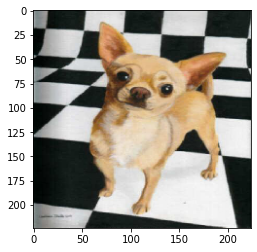

test_y = 0 , predicted = 0


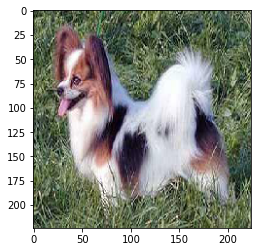

test_y = 6 , predicted = 6


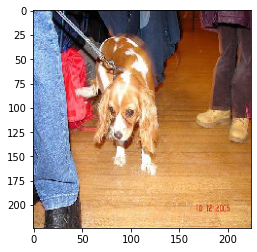

test_y = 5 , predicted = 5


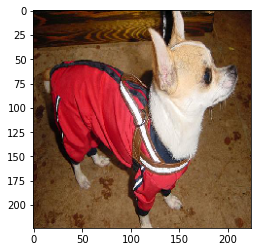

test_y = 0 , predicted = 0


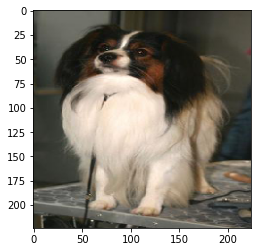

test_y = 1 , predicted = 6


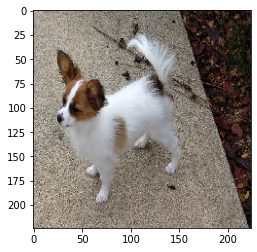

test_y = 6 , predicted = 6


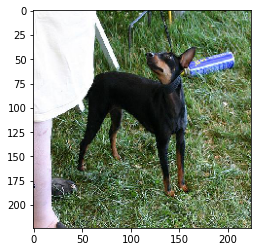

test_y = 7 , predicted = 0


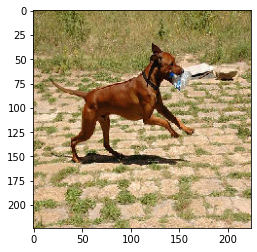

test_y = 8 , predicted = 8


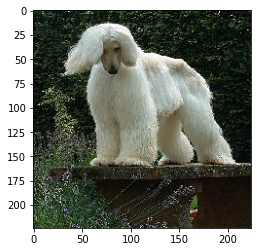

test_y = 9 , predicted = 2


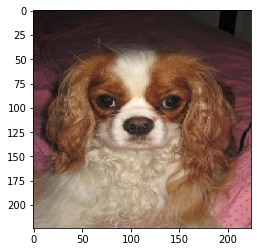

test_y = 5 , predicted = 5


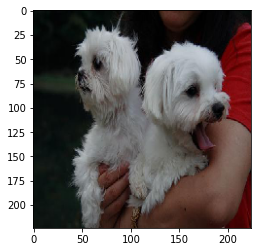

test_y = 2 , predicted = 2


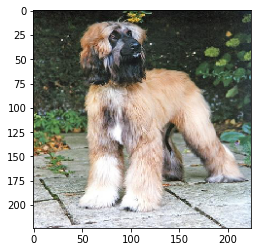

test_y = 9 , predicted = 9


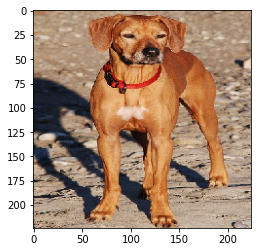

test_y = 8 , predicted = 8


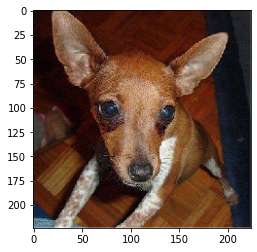

test_y = 7 , predicted = 0


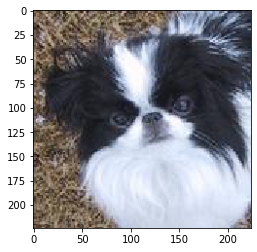

test_y = 1 , predicted = 4


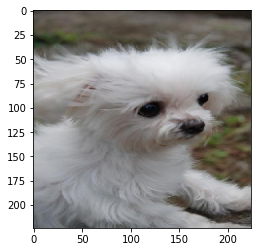

test_y = 2 , predicted = 2


In [4]:
test_data_generator = ImageDataGenerator(
).flow_from_directory(
    "dogs_prepared/test",
    target_size=(224,224),
    batch_size=16,
    class_mode='sparse'
)

while True:
  test_x, test_y = next(test_data_generator)  #batch_size 만큼 꺼냄

  preprocessed_test_x = vgg16.preprocess_input(test_x.copy())

  y_ = model.predict(preprocessed_test_x)

  predicted = np.argmax(y_, axis=1)

  for i, a_image in enumerate(test_x):
    plt.imshow(a_image/255.0)
    plt.show()
    print('test_y =', test_y.astype(int)[i], ", predicted =", predicted[i])
  break

# Resnet

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers, models, layers, Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from tensorflow.keras.applications import resnet50   #모듈이름
from tensorflow.keras.applications import ResNet50   #클래스이름


conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
conv_layers.trainable = False

model = Sequential()
model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


train_data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
    "dogs_prepared/train",
    target_size=(224,224),
    batch_size=64,
    class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
    preprocessing_function=resnet50.preprocess_input
).flow_from_directory(
    "dogs_prepared/test",
    target_size=(224,224),
    batch_size=64,
    class_mode='sparse'
)

model.fit(
    train_data_generator,
    validation_data=test_data_generator,
    epochs=10
)

loss, acc = model.evaluate(test_data_generator)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_data_generator)
predicted = np.argmax(y_, axis=1)

custom_labels = list(test_data_generator.class_indices.keys())
print('predicted category index =', predicted[0])
print('predicted category name =', custom_labels[predicted[0]])

94781440/94765736 [==============================] - 1s 0us/step
Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/24 [==============================] - 26s 941ms/step - loss: 58.0266 - accuracy: 0.5911 - val_loss: 4.8167 - val_accuracy: 0.8660
Epoch 2/10
24/24 [==============================] - 21s 885ms/step - loss: 4.4309 - accuracy: 0.8439 - val_loss: 3.3140 - val_accuracy: 0.8660
Epoch 3/10
24/24 [==============================] - 21s 885ms/step - loss: 3.5572 - accuracy: 0.8589 - val_loss: 2.3498 - val_accuracy: 0.8943
Epoch 4/10
24/24 [==============================] - 21s 885ms/step - loss: 4.1314 - accuracy: 0.8563 - val_loss: 2.9074 - val_accuracy: 0.9046
Epoch 5/10
24/24 [==============================] - 21s 893ms/step - loss: 3.0254 - accuracy: 0.8811 - val_loss: 2.8629 - val_accuracy: 0.9227
Epoch 6/10
24/24 [==============================] - 21s 889ms/step - loss: 2.4772 - accuracy: 0.9007 - val_loss: 2.2104 - val_accuracy

## 예측 결과 출력

Found 388 images belonging to 10 classes.


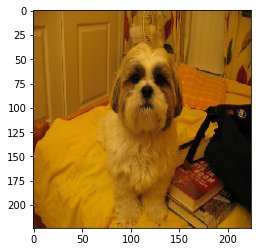

test_y = 4 , predicted = 4


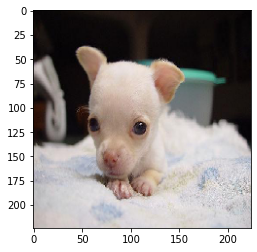

test_y = 0 , predicted = 0


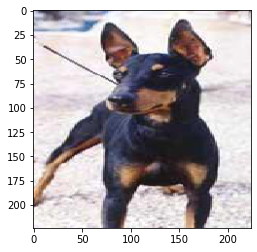

test_y = 7 , predicted = 7


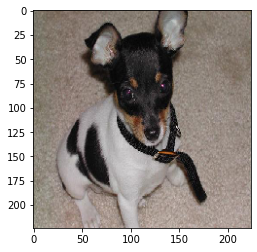

test_y = 7 , predicted = 7


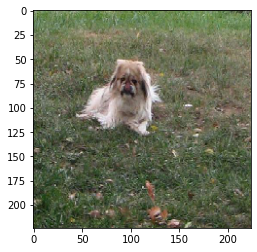

test_y = 3 , predicted = 3


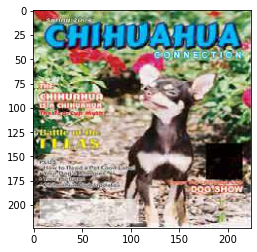

test_y = 0 , predicted = 0


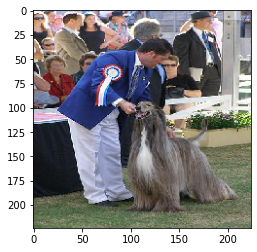

test_y = 9 , predicted = 9


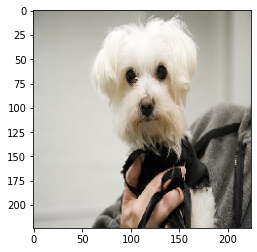

test_y = 2 , predicted = 2


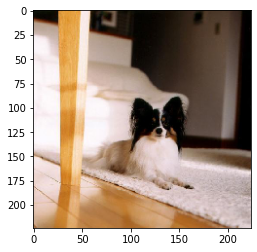

test_y = 6 , predicted = 6


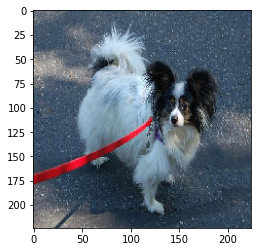

test_y = 6 , predicted = 6


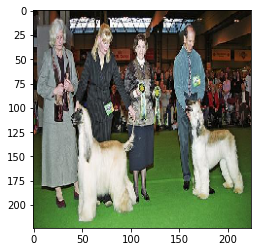

test_y = 9 , predicted = 9


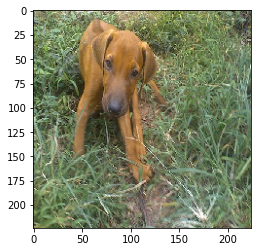

test_y = 8 , predicted = 8


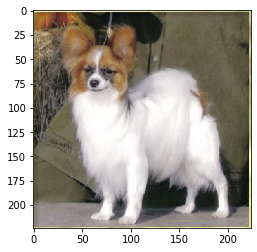

test_y = 6 , predicted = 6


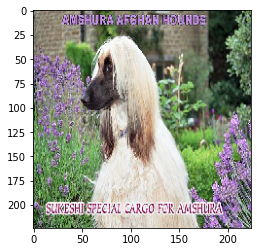

test_y = 9 , predicted = 9


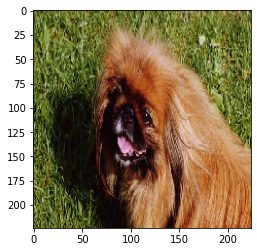

test_y = 3 , predicted = 3


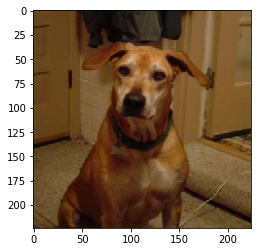

test_y = 8 , predicted = 8


In [6]:
test_data_generator = ImageDataGenerator(
).flow_from_directory(
    "dogs_prepared/test",
    target_size=(224,224),
    batch_size=16,
    class_mode='sparse'
)

while True:
  test_x, test_y = next(test_data_generator)  #batch_size 만큼 꺼냄

  preprocessed_test_x = resnet50.preprocess_input(test_x.copy())

  y_ = model.predict(preprocessed_test_x)

  predicted = np.argmax(y_, axis=1)

  for i, a_image in enumerate(test_x):
    plt.imshow(a_image/255.0)
    plt.show()
    print('test_y =', test_y.astype(int)[i], ", predicted =", predicted[i])
  break

# EfficientNetB1

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers, models, layers, Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from tensorflow.keras.applications import efficientnet   #모듈이름
from tensorflow.keras.applications import EfficientNetB1   #클래스이름


conv_layers = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224,224,3))
conv_layers.trainable = False

model = Sequential()
model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


train_data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=efficientnet.preprocess_input
).flow_from_directory(
    "dogs_prepared/train",
    target_size=(224,224),
    batch_size=64,
    class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
    preprocessing_function=efficientnet.preprocess_input
).flow_from_directory(
    "dogs_prepared/test",
    target_size=(224,224),
    batch_size=64,
    class_mode='sparse'
)

model.fit(
    train_data_generator,
    validation_data=test_data_generator,
    epochs=10
)

loss, acc = model.evaluate(test_data_generator)
print('loss =', loss)
print('acc =', acc)

y_ = model.predict(test_data_generator)
predicted = np.argmax(y_, axis=1)

custom_labels = list(test_data_generator.class_indices.keys())
print('predicted category index =', predicted[0])
print('predicted category name =', custom_labels[predicted[0]])

27033600/27018416 [==============================] - 0s 0us/step
Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/24 [==============================] - 31s 943ms/step - loss: 7.9196 - accuracy: 0.7427 - val_loss: 1.5470 - val_accuracy: 0.9175
Epoch 2/10
24/24 [==============================] - 21s 858ms/step - loss: 2.5612 - accuracy: 0.8668 - val_loss: 1.7332 - val_accuracy: 0.8943
Epoch 3/10
24/24 [==============================] - 21s 856ms/step - loss: 1.9169 - accuracy: 0.9014 - val_loss: 2.7688 - val_accuracy: 0.8505
Epoch 4/10
24/24 [==============================] - 21s 855ms/step - loss: 1.9017 - accuracy: 0.9059 - val_loss: 1.2366 - val_accuracy: 0.9356
Epoch 5/10
24/24 [==============================] - 21s 860ms/step - loss: 1.8245 - accuracy: 0.9170 - val_loss: 0.9449 - val_accuracy: 0.9407
Epoch 6/10
24/24 [==============================] - 21s 856ms/step - loss: 1.2756 - accuracy: 0.9288 - val_loss: 1.2844 - val_accuracy:

## 예측 결과 출력

Found 388 images belonging to 10 classes.


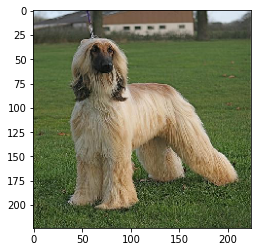

test_y = 9 , predicted = 9


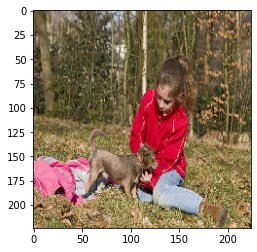

test_y = 0 , predicted = 0


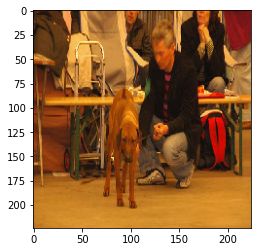

test_y = 8 , predicted = 8


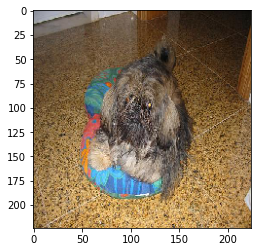

test_y = 4 , predicted = 4


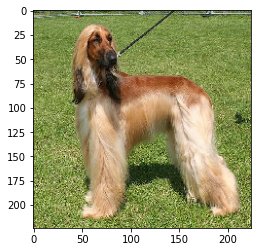

test_y = 9 , predicted = 9


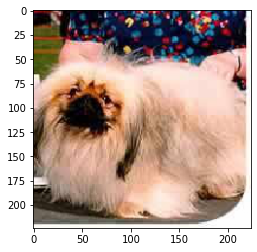

test_y = 3 , predicted = 3


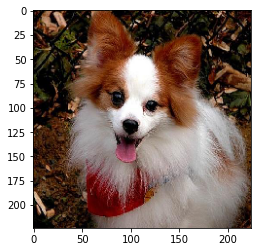

test_y = 6 , predicted = 6


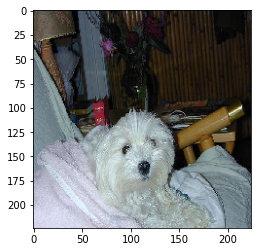

test_y = 2 , predicted = 2


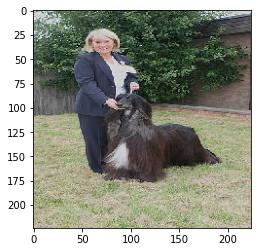

test_y = 9 , predicted = 9


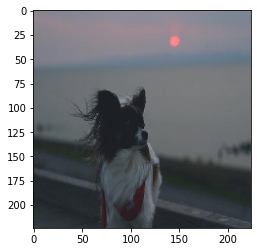

test_y = 6 , predicted = 6


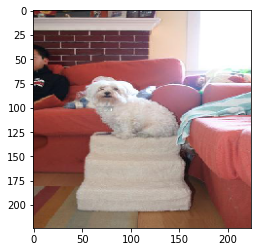

test_y = 2 , predicted = 2


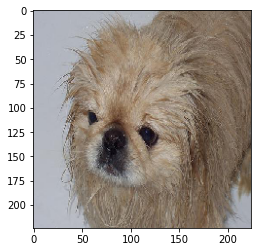

test_y = 3 , predicted = 3


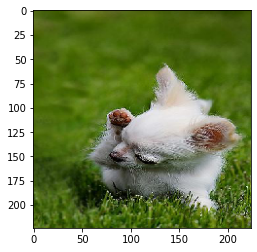

test_y = 0 , predicted = 0


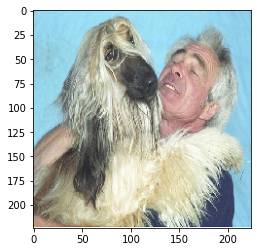

test_y = 9 , predicted = 9


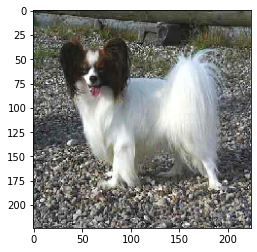

test_y = 6 , predicted = 6


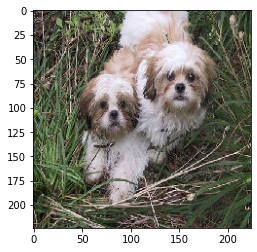

test_y = 4 , predicted = 4


In [8]:
test_data_generator = ImageDataGenerator(
).flow_from_directory(
    "dogs_prepared/test",
    target_size=(224,224),
    batch_size=16,
    class_mode='sparse'
)

while True:
  test_x, test_y = next(test_data_generator)  #batch_size 만큼 꺼냄

  preprocessed_test_x = efficientnet.preprocess_input(test_x.copy())

  y_ = model.predict(preprocessed_test_x)

  predicted = np.argmax(y_, axis=1)

  for i, a_image in enumerate(test_x):
    plt.imshow(a_image/255.0)
    plt.show()
    print('test_y =', test_y.astype(int)[i], ", predicted =", predicted[i])
  break